In [3]:
import pandas as pd
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display(df1, df2)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [4]:
# Combine Single Data Frame:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [5]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
df4

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [6]:
pd.merge(df3, df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [7]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})

In [8]:
pd.merge(df1, df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


In [9]:
pd.merge(df1, df2, on='employee')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [10]:
pd.merge(df1, df2)

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [14]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
df1a.join(df2a)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


# JOINS

In [15]:
product=pd.DataFrame({
    'Product_ID':[101,102,103,104,105,106,107],
    'Product_name':['Watch','Bag','Shoes','Smartphone','Books','Oil','Laptop'],
    'Category':['Fashion','Fashion','Fashion','Electronics','Study','Grocery','Electronics'],
    'Price':[299.0,1350.50,2999.0,14999.0,145.0,110.0,79999.0],
    'Seller_City':['Delhi','Mumbai','Chennai','Kolkata','Delhi','Chennai','Bengalore']
})
product

,Product_ID,Product_name,Category,Price,Seller_City
0,101,Watch,Fashion,299.0,Delhi
1,102,Bag,Fashion,1350.5,Mumbai
2,103,Shoes,Fashion,2999.0,Chennai
3,104,Smartphone,Electronics,14999.0,Kolkata
4,105,Books,Study,145.0,Delhi
5,106,Oil,Grocery,110.0,Chennai
6,107,Laptop,Electronics,79999.0,Bengalore


In [16]:
customer=pd.DataFrame({
    'id':[1,2,3,4,5,6,7,8,9],
    'name':['Olivia','Aditya','Cory','Isabell','Dominic','Tyler','Samuel','Daniel','Jeremy'],
    'age':[20,25,15,10,30,65,35,18,23],
    'Product_ID':[101,0,106,0,103,104,0,0,107],
    'Purchased_Product':['Watch','NA','Oil','NA','Shoes','Smartphone','NA','NA','Laptop'],
    'City':['Mumbai','Delhi','Bangalore','Chennai','Chennai','Delhi','Kolkata','Delhi','Mumbai']
})
customer

,id,name,age,Product_ID,Purchased_Product,City
0,1,Olivia,20,101,Watch,Mumbai
1,2,Aditya,25,0,NA,Delhi
2,3,Cory,15,106,Oil,Bangalore
3,4,Isabell,10,0,NA,Chennai
4,5,Dominic,30,103,Shoes,Chennai
5,6,Tyler,65,104,Smartphone,Delhi
6,7,Samuel,35,0,NA,Kolkata
7,8,Daniel,18,0,NA,Delhi
8,9,Jeremy,23,107,Laptop,Mumbai


The merge() function in Pandas is our friend here. By default, the merge function performs an inner join. It takes both the dataframes as arguments and the name of the column on which the join has to be performed:

In [17]:
pd.merge(product,customer,on='Product_ID')

,Product_ID,Product_name,Category,Price,Seller_City,id,name,age,Purchased_Product,City
0,101,Watch,Fashion,299.0,Delhi,1,Olivia,20,Watch,Mumbai
1,103,Shoes,Fashion,2999.0,Chennai,5,Dominic,30,Shoes,Chennai
2,104,Smartphone,Electronics,14999.0,Kolkata,6,Tyler,65,Smartphone,Delhi
3,106,Oil,Grocery,110.0,Chennai,3,Cory,15,Oil,Bangalore
4,107,Laptop,Electronics,79999.0,Bengalore,9,Jeremy,23,Laptop,Mumbai


In [20]:
pd.merge(product,customer,how='inner')

,Product_ID,Product_name,Category,Price,Seller_City,id,name,age,Purchased_Product,City
0,101,Watch,Fashion,299.0,Delhi,1,Olivia,20,Watch,Mumbai
1,103,Shoes,Fashion,2999.0,Chennai,5,Dominic,30,Shoes,Chennai
2,104,Smartphone,Electronics,14999.0,Kolkata,6,Tyler,65,Smartphone,Delhi
3,106,Oil,Grocery,110.0,Chennai,3,Cory,15,Oil,Bangalore
4,107,Laptop,Electronics,79999.0,Bengalore,9,Jeremy,23,Laptop,Mumbai


In [21]:
# By defualt everything is inner join

In [22]:
# Reverse 
pd.merge(customer,product,how='inner')

,id,name,age,Product_ID,Purchased_Product,City,Product_name,Category,Price,Seller_City
0,1,Olivia,20,101,Watch,Mumbai,Watch,Fashion,299.0,Delhi
1,3,Cory,15,106,Oil,Bangalore,Oil,Grocery,110.0,Chennai
2,5,Dominic,30,103,Shoes,Chennai,Shoes,Fashion,2999.0,Chennai
3,6,Tyler,65,104,Smartphone,Delhi,Smartphone,Electronics,14999.0,Kolkata
4,9,Jeremy,23,107,Laptop,Mumbai,Laptop,Electronics,79999.0,Bengalore


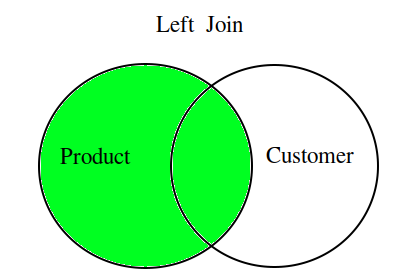

In [27]:
pd.merge(product,customer,how='left')

,Product_ID,Product_name,Category,Price,Seller_City,id,name,age,Purchased_Product,City
0,101,Watch,Fashion,299.0,Delhi,1.0,Olivia,20.0,Watch,Mumbai
1,102,Bag,Fashion,1350.5,Mumbai,NaN,NaN,NaN,NaN,NaN
2,103,Shoes,Fashion,2999.0,Chennai,5.0,Dominic,30.0,Shoes,Chennai
3,104,Smartphone,Electronics,14999.0,Kolkata,6.0,Tyler,65.0,Smartphone,Delhi
4,105,Books,Study,145.0,Delhi,NaN,NaN,NaN,NaN,NaN
5,106,Oil,Grocery,110.0,Chennai,3.0,Cory,15.0,Oil,Bangalore
6,107,Laptop,Electronics,79999.0,Bengalore,9.0,Jeremy,23.0,Laptop,Mumbai


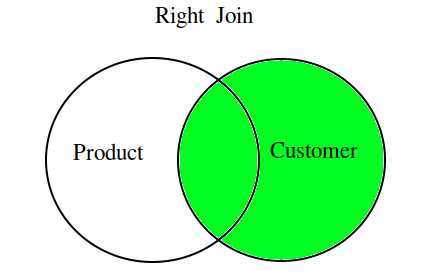

In [28]:
pd.merge(product,customer,how='right')

,Product_ID,Product_name,Category,Price,Seller_City,id,name,age,Purchased_Product,City
0,101,Watch,Fashion,299.0,Delhi,1,Olivia,20,Watch,Mumbai
1,103,Shoes,Fashion,2999.0,Chennai,5,Dominic,30,Shoes,Chennai
2,104,Smartphone,Electronics,14999.0,Kolkata,6,Tyler,65,Smartphone,Delhi
3,106,Oil,Grocery,110.0,Chennai,3,Cory,15,Oil,Bangalore
4,107,Laptop,Electronics,79999.0,Bengalore,9,Jeremy,23,Laptop,Mumbai
5,0,NaN,NaN,NaN,NaN,2,Aditya,25,NA,Delhi
6,0,NaN,NaN,NaN,NaN,4,Isabell,10,NA,Chennai
7,0,NaN,NaN,NaN,NaN,7,Samuel,35,NA,Kolkata
8,0,NaN,NaN,NaN,NaN,8,Daniel,18,NA,Delhi


In [26]:
pd.merge(product,customer,how='outer')

,Product_ID,Product_name,Category,Price,Seller_City,id,name,age,Purchased_Product,City
0,101,Watch,Fashion,299.0,Delhi,1.0,Olivia,20.0,Watch,Mumbai
1,102,Bag,Fashion,1350.5,Mumbai,NaN,NaN,NaN,NaN,NaN
2,103,Shoes,Fashion,2999.0,Chennai,5.0,Dominic,30.0,Shoes,Chennai
3,104,Smartphone,Electronics,14999.0,Kolkata,6.0,Tyler,65.0,Smartphone,Delhi
4,105,Books,Study,145.0,Delhi,NaN,NaN,NaN,NaN,NaN
5,106,Oil,Grocery,110.0,Chennai,3.0,Cory,15.0,Oil,Bangalore
6,107,Laptop,Electronics,79999.0,Bengalore,9.0,Jeremy,23.0,Laptop,Mumbai
7,0,NaN,NaN,NaN,NaN,2.0,Aditya,25.0,NA,Delhi
8,0,NaN,NaN,NaN,NaN,4.0,Isabell,10.0,NA,Chennai
9,0,NaN,NaN,NaN,NaN,7.0,Samuel,35.0,NA,Kolkata
